In [1]:
import optuna
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [2]:
os.chdir("../")
os.getcwd()

'/home/izam/coding/Customer-Churn'

In [3]:
train = pd.read_csv("./artifacts/data_transformation/train.csv")
test = pd.read_csv("./artifacts/data_transformation/test.csv")

train.shape, test.shape

((5634, 20), (1409, 20))

In [4]:
def objective(trial):
        X_train= train.drop(["Churn"], axis=1)
        y_train = train["Churn"]
        X_test = test.drop(["Churn"], axis=1)
        y_test = test["Churn"]  

        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
        min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

        model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
        )

        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_pred=prediction, y_true=y_test)
        
        return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_params
print(f"best params  -{best_params}")


best_trial = study.best_trial
print(f"Best Trial Number: {best_trial.number}")
print(f"Best Trial Value (Accuracy): {best_trial.value}")

[I 2023-12-16 14:08:46,257] A new study created in memory with name: no-name-5d69fc2f-7183-4d71-b68e-97b1ba4bc23d
[I 2023-12-16 14:08:46,345] Trial 0 finished with value: 0.7530163236337828 and parameters: {'n_estimators': 54, 'max_depth': 20, 'min_samples_split': 0.17659305284754293, 'min_samples_leaf': 0.21871114006050016}. Best is trial 0 with value: 0.7530163236337828.
[I 2023-12-16 14:08:46,500] Trial 1 finished with value: 0.7530163236337828 and parameters: {'n_estimators': 121, 'max_depth': 8, 'min_samples_split': 0.6822301305043553, 'min_samples_leaf': 0.28333551117831096}. Best is trial 0 with value: 0.7530163236337828.
[I 2023-12-16 14:08:46,649] Trial 2 finished with value: 0.7530163236337828 and parameters: {'n_estimators': 133, 'max_depth': 26, 'min_samples_split': 0.8455719368617274, 'min_samples_leaf': 0.44514042053199976}. Best is trial 0 with value: 0.7530163236337828.
[I 2023-12-16 14:08:46,792] Trial 3 finished with value: 0.7530163236337828 and parameters: {'n_estim

best params  -{'n_estimators': 54, 'max_depth': 20, 'min_samples_split': 0.17659305284754293, 'min_samples_leaf': 0.21871114006050016}
Best Trial Number: 0
Best Trial Value (Accuracy): 0.7530163236337828


In [5]:
os.chdir("research/data")
import pandas as pd
import numpy as np
import dataframe_image as dfi

In [6]:
df = pd.DataFrame(np.random.randn(6, 6), columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,-1.752913,0.185552,0.097585,-0.077004,1.219086,0.727544
1,-1.437340,0.579537,0.409449,-1.496316,1.053916,1.243660
2,-1.322251,0.150955,1.075080,0.758810,-0.615907,0.569390
3,-0.453929,1.029518,-0.610772,-1.608787,1.060331,-0.419335
4,1.598912,0.532969,-0.750221,-0.286269,0.575804,0.379164
5,1.019360,0.165374,-0.516202,0.082292,3.123491,-0.738160


In [9]:
df_styled = df.style.background_gradient()
dfi.export(df_styled, "myimage.png")

In [10]:
from sklearn.metrics import classification_report

y_pred = [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
y_true = [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]

clf = classification_report(y_pred=y_pred, y_true=y_true, labels=[0, 1], output_dict=True)
clf2 = classification_report(y_pred=y_pred, y_true=y_true, labels=[0, 1], output_dict=False)
df = pd.DataFrame(clf).transpose()
df.loc["accuracy", "support"] = df.loc["macro avg", "support"]

dfi.export(df, "hola.png")

In [11]:
print(clf2)

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.33      0.25      0.29         4

    accuracy                           0.55        11
   macro avg       0.48      0.48      0.48        11
weighted avg       0.52      0.55      0.53        11



In [12]:
metric = {"LogisticRegression":{
    "precision":0.5,
    "recall":0.6
    },
    "svm":{
    "precision":0.9,
    "recall":0.3
    },
    "svr":{
    "precision":0.5,
    "recall":0.7
    }
}
metric

{'LogisticRegression': {'precision': 0.5, 'recall': 0.6},
 'svm': {'precision': 0.9, 'recall': 0.3},
 'svr': {'precision': 0.5, 'recall': 0.7}}

In [13]:
df = pd.DataFrame(metric).transpose()
df

,precision,recall
LogisticRegression,0.5,0.6
svm,0.9,0.3
svr,0.5,0.7


<Axes: >

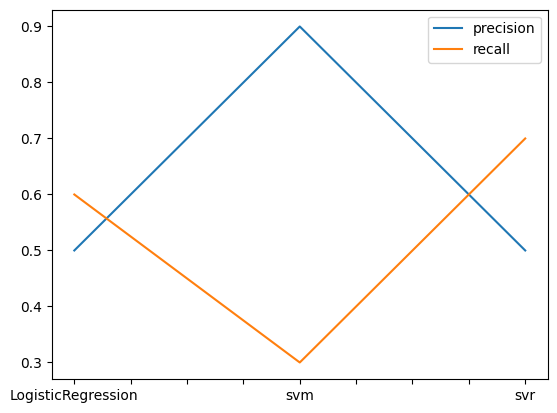

In [14]:
import matplotlib.pyplot as plt
df.plot()


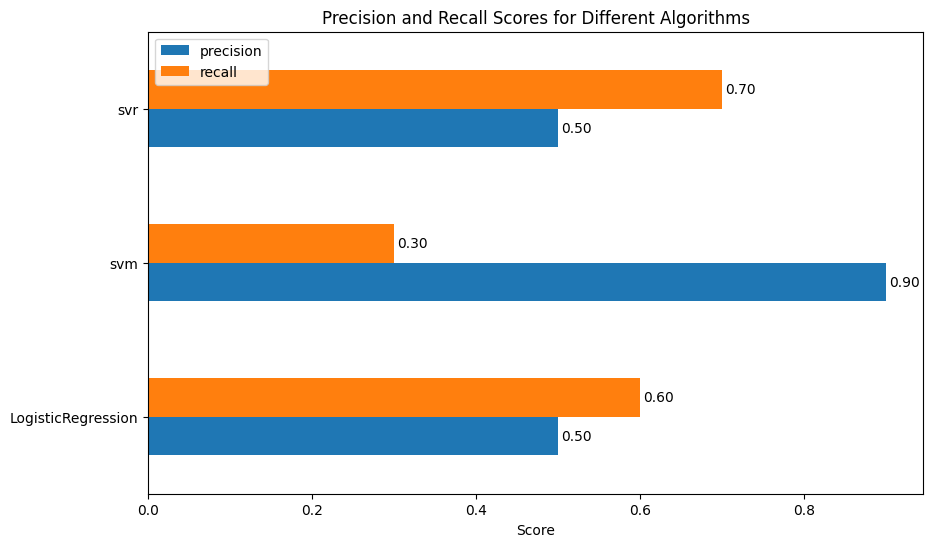

In [15]:
ax = df.plot(kind='barh', figsize=(10, 6))
ax.set_xlabel('Score')
ax.set_title('Precision and Recall Scores for Different Algorithms')

# Annotating each bar with the precision and recall values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width()+0.005, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.legend(loc="upper left")
plt.show()

In [18]:
os.chdir("saved_models")


FileNotFoundError: [Errno 2] No such file or directory: 'saved_models'

In [28]:
ls = sorted(os.listdir())
os.path.splitext(ls[-2])[0][-2:]

'__'